In [1]:
%matplotlib widget
from easydynamics.Analysis import Analysis

import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
from easydynamics.sample import DHOComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel

from easydynamics.Experiment import Experiment

import matplotlib.pyplot as plt


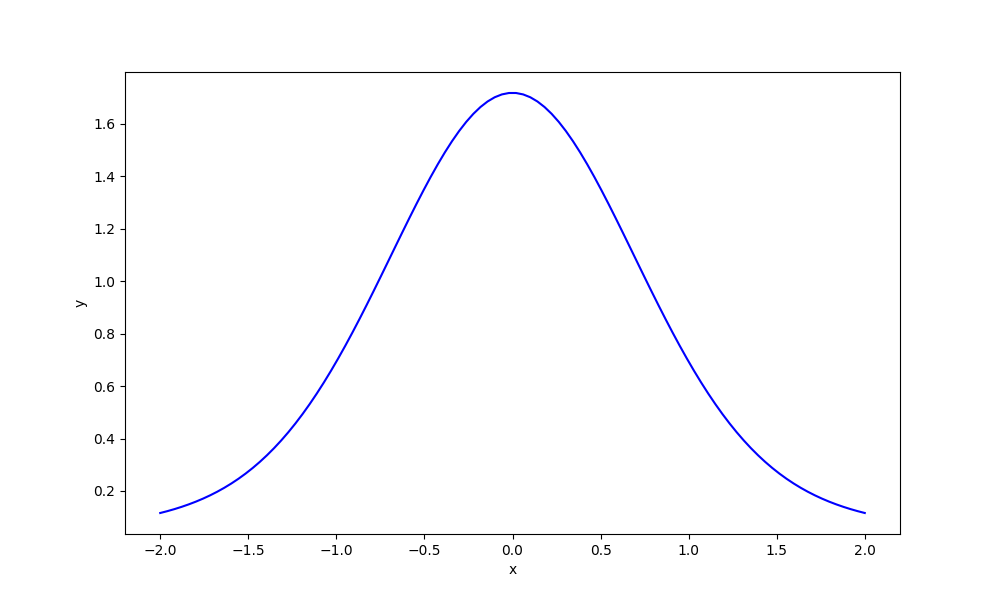

In [2]:

MyAnalysis = Analysis(name='MyAnalysis')






Gaussian= GaussianComponent(center=0,width=0.5,amplitude=1)
Lorentzian=LorentzianComponent(center=0, width=0.5, amplitude=1)
DHO=DHOComponent(center=1, width=0.3, area=1.2)
Background=PolynomialComponent(coefficients=[0.1, 0.1])

Sample= SampleModel()
Sample.add_component(Gaussian)
Sample.add_component(Lorentzian)
# Sample.add_component(Background)
# Sample.add_component(DHO)


Resolution=SampleModel()
Resolution.add_component(Gaussian)

Background=SampleModel()
Background.add_component(PolynomialComponent(coefficients=[0.01]))

MyAnalysis.set_sample_model(Sample)
MyAnalysis.set_resolution_model(Resolution)
MyAnalysis.set_background_model(Background)

x=np.linspace(-2, 2, 100)
y=MyAnalysis.calculate_theory(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Theoretical Model', color='blue')
plt.xlabel('x')
plt.ylabel('y')

vanadium_data=Experiment.load_example_vanadium_data_1d()

MyAnalysis.set_data(vanadium_data)

# fit_result=MyAnalysis.fit()


In [3]:
fit_result=MyAnalysis.fit()
print(fit_result[0].n_pars)


a=MyAnalysis.parameters
a

0


[<Parameter 'center': 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'width': 0.5000 meV, bounds=[-inf:inf]>,
 <Parameter 'amplitude': 1.0000, bounds=[-inf:inf]>,
 <Parameter 'center': 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'width': 0.5000 meV, bounds=[-inf:inf]>,
 <Parameter 'amplitude': 1.0000, bounds=[-inf:inf]>,
 <Parameter 'center': 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'width': 0.5000 meV, bounds=[-inf:inf]>,
 <Parameter 'amplitude': 1.0000, bounds=[-inf:inf]>,
 <Parameter 'c0': 0.0100, bounds=[-inf:inf]>]